### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [11]:
lista_alumnos = [("Juan Maniglia", 32, 1.75),
                 ('Pele',27,1.70),
                 ('Marta Mendez', 28, 1.65),
                 ('Carlos Garcia', 30, 1.80),
                 ('Isabella Perez', 29, 1.70),
                 ('Andrea Martinez', 31, 1.78),
                 ('Maria Sanzio', 27, 1.63)
                 ] 

In [9]:
import pandas as pd

In [12]:
df = pd.DataFrame(lista_alumnos,columns=['Nombre', 'Edad', 'Altura'])
df

,Nombre,Edad,Altura
0,Juan Maniglia,32,1.75
1,Pele,27,1.70
2,Marta Mendez,28,1.65
3,Carlos Garcia,30,1.80
4,Isabella Perez,29,1.70
5,Andrea Martinez,31,1.78
6,Maria Sanzio,27,1.63


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  7 non-null      object 
 1   Edad    7 non-null      int64  
 2   Altura  7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 300.0+ bytes


In [14]:
df.describe()

,Edad,Altura
count,7.000000,7.000000
mean,29.142857,1.715714
std,1.951800,0.063994
min,27.000000,1.630000
25%,27.500000,1.675000
50%,29.000000,1.700000
75%,30.500000,1.765000
max,32.000000,1.800000


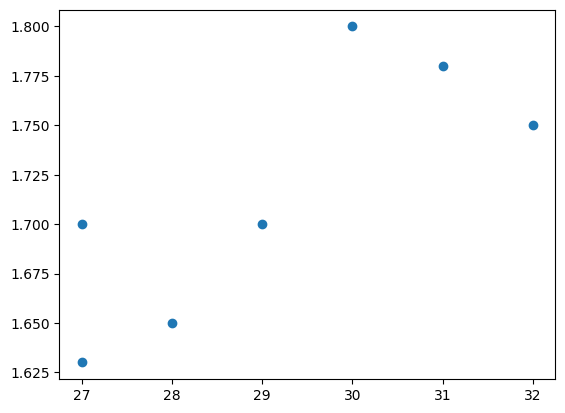

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'],df['Altura'])

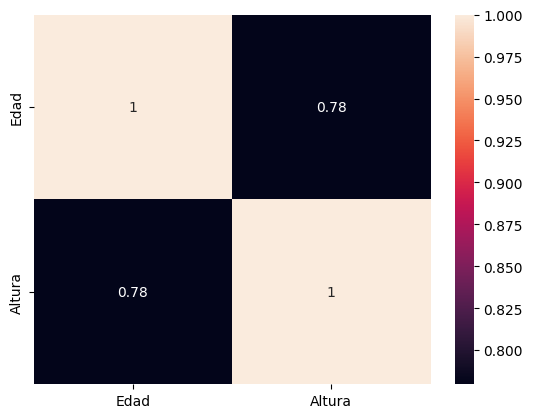

In [18]:
import seaborn as sns
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True);

C:\Users\denis\AppData\Local\Temp\ipykernel_34536\1025652608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Altura']);


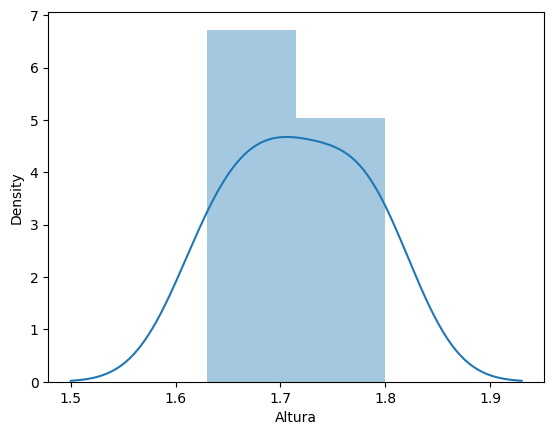

In [19]:
sns.distplot(df['Altura']);

In [29]:
X =  df.drop(columns=['Altura','Nombre'])
y = df['Altura']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (7, 1)
Train features shape: (5, 1)
Train target shape: (5,)
Test features shape: (2, 1)
Test target shape: (2,)


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  

model.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento


LinearRegression()

In [33]:
print(model.intercept_, model.coef_)

0.4069999999999987 [0.045]


(Altura) = 1.85 - 0.0041*(Edad)

In [34]:
# Prediccion
model.predict(X_test)

array([1.847, 1.622])

In [35]:
df_test = pd.DataFrame(X_test)
df_test

,Edad
0,32
1,27


In [36]:
df_test = pd.DataFrame(X_test)
df_test['predict_height'] = model.predict(X_test)
df_test

,Edad,predict_height
0,32,1.847
1,27,1.622


In [37]:
df_test['real_height'] = y_test
df_test

,Edad,predict_height,real_height
0,32,1.847,1.75
1,27,1.622,1.70


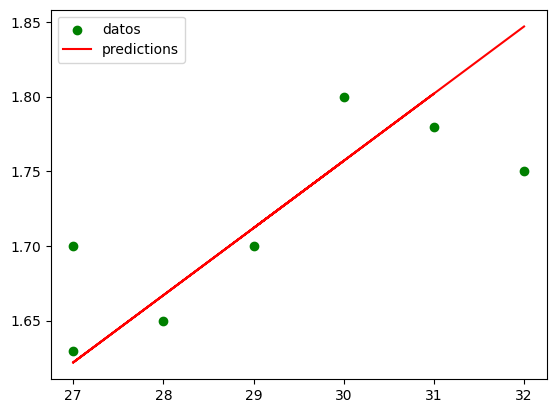

In [38]:
plt.scatter(df['Edad'], df['Altura'], color='g', label="datos");
plt.plot(df['Edad'], model.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [39]:
model.score(X,y)

0.2542965116279078

In [40]:
df_test

,Edad,predict_height,real_height
0,32,1.847,1.75
1,27,1.622,1.70


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

predicciones = model.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- const


In [53]:
print('MAE:', mean_absolute_error())
print('MSE:', mean_squared_error())
print('RMSE:', np.sqrt(mean_squared_error()))

TypeError: missing a required argument: 'y_true'

In [46]:
print('MAPE:', mean_absolute_percentage_error())

MAPE: 0.03253724207144201


In [51]:
model.predict([[85]])

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.50018538])

In [52]:
df_test

,Edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [55]:
df_test['error'] = 
df_test

,Edad,predict_height,real_height,error
0,24,1.752729,1.82,0.067271
17,34,1.711329,1.80,0.088671
15,32,1.719609,1.75,0.030391
1,25,1.748589,1.71,0.038589
8,36,1.703048,1.74,0.036952
5,27,1.740309,1.80,0.059691
11,30,1.727889,1.65,0.077889


In [57]:
df_test['error'].mean()

0.05706488156539665

In [58]:
df_test['error_cuadratico'] = 
df_test

,Edad,predict_height,real_height,error,error_cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [59]:
df_test['error_cuadratico'].mean()

0.0036851216240520687

In [60]:
np.sqrt(df_test['error_cuadratico'].mean())

0.060705202611078306

In [63]:
df_test['error'].mean()/df_test['real_height'].mean()

0.032555352156298005